In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import re
import cv2
import keras
import numpy as nps
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## 3D to 2D

In [50]:
import nibabel as nib
import numpy as np
#import cv2
import os
import matplotlib as mpl
#mpl.use('Qt5Agg')
from matplotlib import pyplot as plt


def saveNii(array, orig_nii, out_path):
    new_img = nib.Nifti1Image(array, orig_nii.affine, orig_nii.header)
    nib.save(new_img, out_path)

def saveNpy(array, out_path):
    np.save(open(out_path, 'wb'), array)    
root_dir = "../data/" 
data_dir = root_dir + "Axial_Data"
train_dir = root_dir + "Axial_Data/Train"
val_dir = root_dir + "Axial_Data/Val"
test_dir = root_dir + "Axial_Data/Test"


if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)    

In [51]:
def get_data_3dto2d(Image_dir , Images, path, flag):
    npy_path = os.path.join(path, flag)
    if not os.path.exists(npy_path):
        os.makedirs(npy_path)  
        
    for img in Images:
        Image_path = os.path.join(Image_dir, img)
        ## Load Image Data
        print(img)
        obj = nib.load(Image_path)
        speedim = np.array(obj.dataobj)
        print(speedim.shape)
        for slicei in range(len(speedim[0, :, 0])):
            slice = speedim[:,slicei,:]
            pat = "pat"+str(re.findall('[0-9]+', img))
            saveNpy(slice, npy_path+"/"+pat+"_"+str(slicei)+'.npy') 
 

In [52]:
print("Image")
SA_Image_dir = "../data/"
Images = os.listdir(SA_Image_dir)
Images.remove(".DS_Store") ,Images.remove(".ipynb_checkpoints")
Images = np.sort(Images)
train_images = Images[:14]  
val_images  = Images[14:18] 
test_images = Images[18:19]
get_data_3dto2d(SA_Image_dir , train_images,train_dir, "Image")
get_data_3dto2d(SA_Image_dir , val_images,val_dir,"Image")
get_data_3dto2d(SA_Image_dir , test_images,test_dir,"Image")
    
print("Label")
SA_Label_dir = "../data/"
Labels = os.listdir(SA_Label_dir)
Labels.remove(".DS_Store") ,Labels.remove(".ipynb_checkpoints")
Labels = np.sort(Labels)
train_labels = Labels[:14] 
val_labels  = Labels[14:18]
test_labels = Labels[18:19]
get_data_3dto2d(SA_Label_dir , train_labels,train_dir, "Labels")
get_data_3dto2d(SA_Label_dir , val_labels,val_dir,"Labels")
get_data_3dto2d(SA_Label_dir , test_labels,test_dir,"Labels")

Image
mr_train_1001_image.nii.gz
(512, 512, 160)
mr_train_1002_image.nii.gz
(512, 512, 128)
mr_train_1003_image.nii.gz
(288, 288, 160)
mr_train_1004_image.nii.gz
(288, 288, 120)
mr_train_1005_image.nii.gz
(288, 288, 130)
mr_train_1006_image.nii.gz
(256, 256, 160)
mr_train_1007_image.nii.gz
(288, 288, 180)
mr_train_1008_image.nii.gz
(288, 288, 130)
mr_train_1009_image.nii.gz
(512, 512, 120)
mr_train_1010_image.nii.gz
(288, 288, 160)
mr_train_1011_image.nii.gz
(288, 288, 160)
mr_train_1012_image.nii.gz
(512, 512, 128)
mr_train_1013_image.nii.gz
(512, 512, 112)
mr_train_1014_image.nii.gz
(512, 512, 160)
mr_train_1015_image.nii.gz
(340, 340, 200)
mr_train_1016_image.nii.gz
(288, 288, 130)
mr_train_1017_image.nii.gz
(288, 288, 140)
mr_train_1018_image.nii.gz
(288, 288, 150)
mr_train_1019_image.nii.gz
(288, 288, 135)
Label
mr_train_1001_label.nii.gz
(512, 512, 160)
mr_train_1002_label.nii.gz
(512, 512, 128)
mr_train_1003_label.nii.gz
(288, 288, 160)
mr_train_1004_label.nii.gz
(288, 288, 120)

In [53]:
print("Image")
SA_Image_dir = "../data/"
Images = os.listdir(SA_Image_dir)
#Images.remove(".DS_Store") ,
#Images.remove(".ipynb_checkpoints")
Images = np.sort(Images)
train_images = Images[1:6]  
val_images  = Images[6:8] 
test_images = Images[8:]
get_data_3dto2d(SA_Image_dir , train_images,train_dir, "Image")
get_data_3dto2d(SA_Image_dir , val_images,val_dir,"Image")
get_data_3dto2d(SA_Image_dir , test_images,test_dir,"Image")
    
print("Label")
SA_Label_dir = "../data/"
Labels = os.listdir(SA_Label_dir)
#Labels.remove(".DS_Store") ,
Labels.remove(".ipynb_checkpoints")
Labels = np.sort(Labels)
train_labels = Labels[1:6] 
val_labels  = Labels[6:8]
test_labels = Labels[8:]
get_data_3dto2d(SA_Label_dir , train_labels,train_dir, "Labels")
get_data_3dto2d(SA_Label_dir , val_labels,val_dir,"Labels")
get_data_3dto2d(SA_Label_dir , test_labels,test_dir,"Labels")

Image
training_axial_full_pat1.nii.gz
(384, 384, 155)
training_axial_full_pat2.nii.gz
(384, 384, 200)
training_axial_full_pat3.nii.gz
(384, 384, 160)
training_axial_full_pat4.nii.gz
(256, 256, 140)
training_axial_full_pat5.nii.gz
(256, 256, 180)
training_axial_full_pat6.nii.gz
(528, 528, 150)
training_axial_full_pat7.nii.gz
(528, 528, 200)
training_axial_full_pat8.nii.gz
(384, 384, 140)
training_axial_full_pat9.nii.gz
(384, 384, 180)
Label
pat1.nii.gz
(384, 384, 155)
pat2.nii.gz
(384, 384, 200)
pat3.nii.gz
(384, 384, 160)
pat4.nii.gz
(256, 256, 140)
pat5.nii.gz
(256, 256, 180)
pat6.nii.gz
(528, 528, 150)
pat7.nii.gz
(528, 528, 200)
pat8.nii.gz
(384, 384, 140)
pat9.nii.gz
(384, 384, 180)


## Data Loader

In [2]:
DATA_DIR = '../data/'
x_train_dir, y_train_dir = os.path.join(DATA_DIR,"Train", 'Image') , os.path.join(DATA_DIR, "Train",'Labels')
x_valid_dir, y_valid_dir =  os.path.join(DATA_DIR, "Val",'Image') , os.path.join(DATA_DIR,"Val" ,'Labels')
x_test_dir, y_test_dir =  os.path.join(DATA_DIR,"Test",'Image') , os.path.join(DATA_DIR,"Test" ,'Labels')



In [35]:
import re
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(15, 15))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image , cmap = 'gray')
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]    
    

# classes for data loading and preprocessing
class Dataset:
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        alist=os.listdir(images_dir)
        alist.sort(key=natural_keys)
        #print(alist)
        self.ids = alist
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = np.load(self.images_fps[i])
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = np.load(self.masks_fps[i], 0)
        image = np.expand_dims(image, axis=2)
        mask = np.expand_dims(mask, axis=2)
        #print(image.shape)
        new_image = np.concatenate((image, image), axis=2)
        image = np.concatenate((new_image, image), axis=2)
        
        # extract certain classes from mask (e.g. cars)
        #masks = [(mask == v) for v in self.class_values]
        #mask = np.stack(masks, axis=-1).astype('float')
        
        # add background if mask is not binary
        
        #if mask.shape[-1] != 1:
            #background = 1 - mask.sum(axis=-1, keepdims=True)
            #mask = np.concatenate((mask, background), axis=-1)
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)
    
    
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        #print(len(data))
        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

(384, 155, 3) (384, 155, 1)


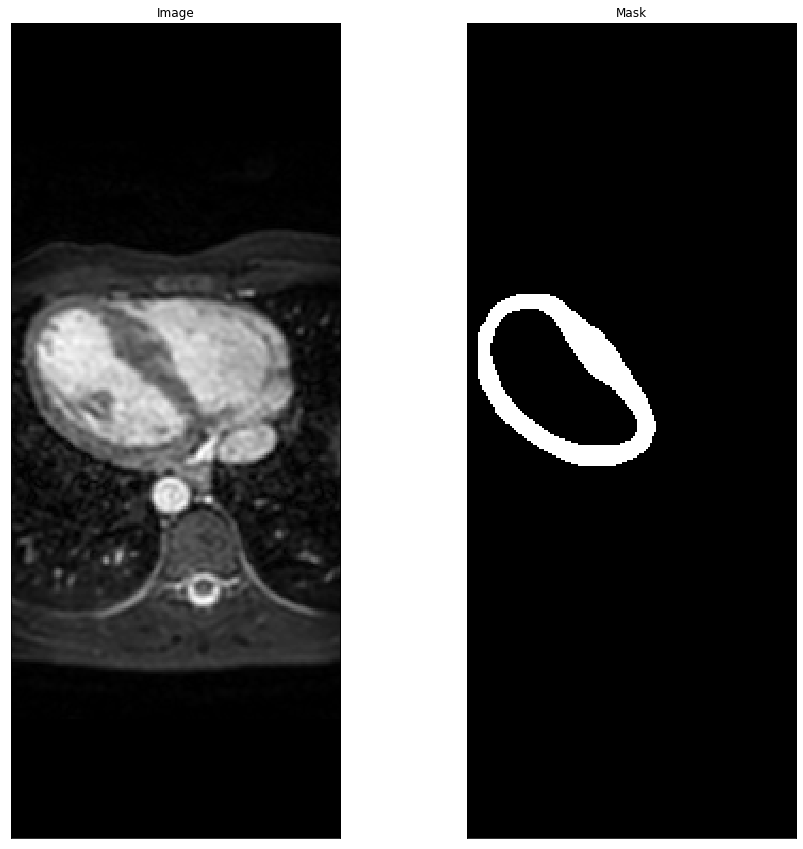

In [37]:

# Lets look at data we have
dataset = Dataset(x_train_dir, y_train_dir)

image, mask = dataset[215] # get some sample
print(image.shape, mask.shape)
img0= image[:,:,0]
img1= image[:,:,1]
img2= image[:,:,2]
mask = np.squeeze(mask, 2)
visualize(
    image=img2, mask = mask)

(528, 150, 3) (528, 150, 1)


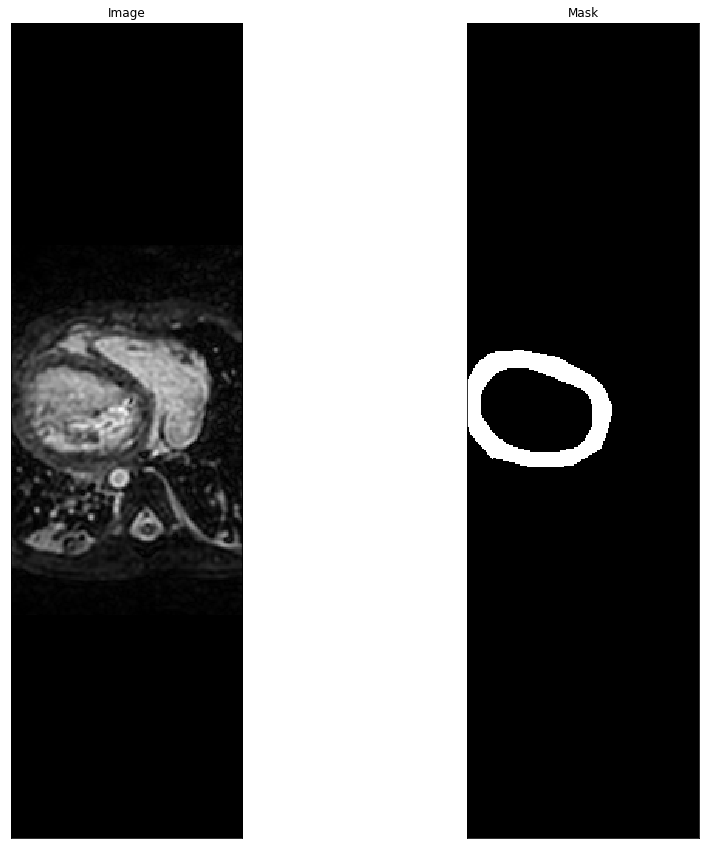

In [41]:

# Lets look at data we have
dataset = Dataset(x_valid_dir, y_valid_dir)

image, mask = dataset[286] # get some sample
print(image.shape, mask.shape)
img0= image[:,:,0]
img1= image[:,:,1]
img2= image[:,:,2]
mask = np.squeeze(mask, 2)
visualize(
    image=img2, mask = mask)

In [42]:

import albumentations as A
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        #A.HorizontalFlip(p=0.5),

        #A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        A.PadIfNeeded(min_height=160, min_width=160, always_apply=True, border_mode=0),
        #A.RandomCrop(height=160, width=160, always_apply=True),
        A.CenterCrop(height=160, width=160),
        #A.IAAAdditiveGaussianNoise(p=0.2),
        A.IAAPerspective(p=0.5),

        #A.OneOf(
            #[
                #A.CLAHE(p=1),
                #A.RandomBrightness(p=1),
                #A.RandomGamma(p=1),
            #],
            #p=0.9,
        #),

        #A.OneOf(
            #[
               #A.IAASharpen(p=1),
                #A.Blur(blur_limit=3, p=1),
               #A.MotionBlur(blur_limit=3, p=1),
            #],
           #p=0.9,
        #),

        #A.OneOf(
            #[
               # A.RandomContrast(p=1),
                #A.HueSaturationValue(p=1),
            #],
            #p=0.9,
        #),
        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        A.PadIfNeeded(min_height=160, min_width=160, always_apply=True, border_mode=0),
        A.CenterCrop(height=160, width=160),        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

(160, 160, 3) (160, 160, 1)


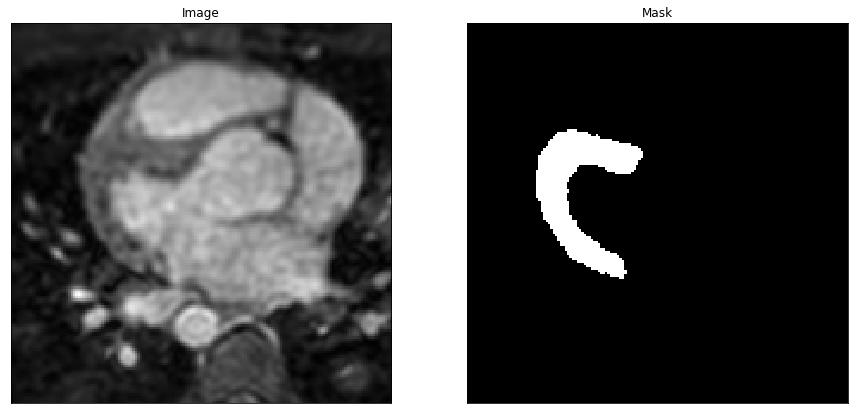

In [47]:

# Lets look at augmented data we have
dataset = Dataset(x_train_dir, y_train_dir, augmentation=get_training_augmentation(),preprocessing=get_preprocessing(preprocess_input))

image, mask = dataset[170] # get some sample
print(image.shape, mask.shape)
img0= image[:,:,0]
img1= image[:,:,1]
img2= image[:,:,2]
mask = np.squeeze(mask, 2)
visualize(
    image=img2, mask = mask)

(160, 160, 3) (160, 160, 1)


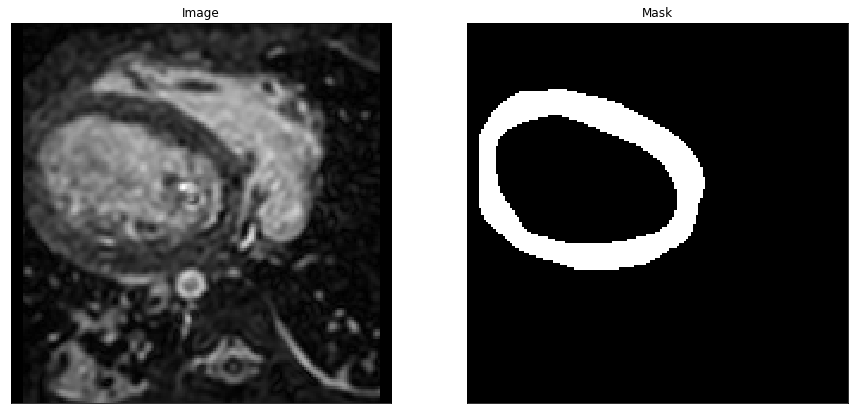

In [52]:
dataset = Dataset(x_valid_dir, y_valid_dir, augmentation=get_training_augmentation(), preprocessing=get_preprocessing(preprocess_input))
image, mask = dataset[291] # get some sample
print(image.shape, mask.shape)
img0= image[:,:,0]
img1= image[:,:,1]
img2= image[:,:,2]
mask = np.squeeze(mask, 2)
visualize(
    image=img2, mask = mask)

## Model

In [8]:
import segmentation_models as sm
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
BACKBONE = 'efficientnetb3'
BATCH_SIZE = 10
LR = 0.0001
EPOCHS = 5
N = 3
weight_file  = "efficientnet-b3_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5"
#weight_file  = "axis_best_model.h5"
preprocess_input = sm.get_preprocessing(BACKBONE)

n_classes = 1   # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation , encoder_weights= weight_file)
base_model = model
# define optomizer
optim = keras.optimizers.Adam(LR)

#inp = Input(shape=(None, None, N))
#l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
#out = base_model(l1)
#model = Model(inp, out, name=base_model.name)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
###
# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics)

Segmentation Models: using `keras` framework.


In [9]:
# load best weights
#model.load_weights('axis_best_model.h5')

In [53]:
# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    #classes=CLASSES, 
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    #classes=CLASSES, 
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

# check shapes for errors
print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)
#assert train_dataloader[0][0].shape == (BATCH_SIZE, 160, 160, 3)
#assert train_dataloader[0][1].shape == (BATCH_SIZE, 160, 160,1)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('./axis_best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(),
]

(10, 160, 160, 3)
(10, 160, 160, 1)


In [70]:
# train model 
history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=valid_dataloader,  
    validation_steps=len(valid_dataloader))

Epoch 1/5
700/700 [==============================] - 1669s 2s/step - loss: 0.1738 - iou_score: 0.7959 - f1-score: 0.8748 - val_loss: 0.1869 - val_iou_score: 0.6459 - val_f1-score: 0.7640
Epoch 2/5
700/700 [==============================] - 2346s 3s/step - loss: 0.1665 - iou_score: 0.8086 - f1-score: 0.8840 - val_loss: 0.1835 - val_iou_score: 0.6155 - val_f1-score: 0.7359
Epoch 3/5
700/700 [==============================] - 2833s 4s/step - loss: 0.1646 - iou_score: 0.8110 - f1-score: 0.8876 - val_loss: 0.1703 - val_iou_score: 0.6354 - val_f1-score: 0.7557
Epoch 4/5
700/700 [==============================] - 2856s 4s/step - loss: 0.1616 - iou_score: 0.8084 - f1-score: 0.8825 - val_loss: 0.1875 - val_iou_score: 0.6437 - val_f1-score: 0.7649
Epoch 5/5
700/700 [==============================] - 2401s 3s/step - loss: 0.1517 - iou_score: 0.8299 - f1-score: 0.8995 - val_loss: 0.1866 - val_iou_score: 0.6378 - val_f1-score: 0.7579


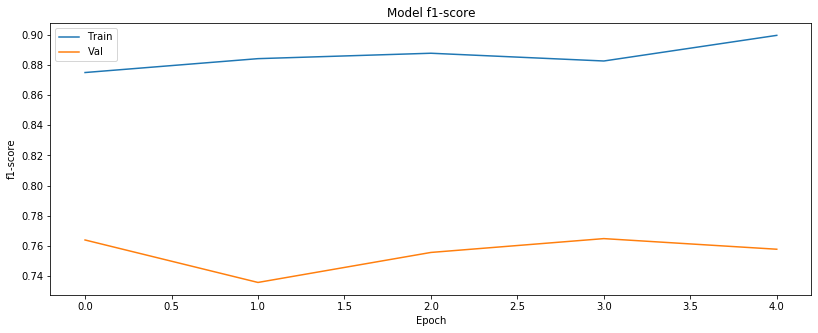

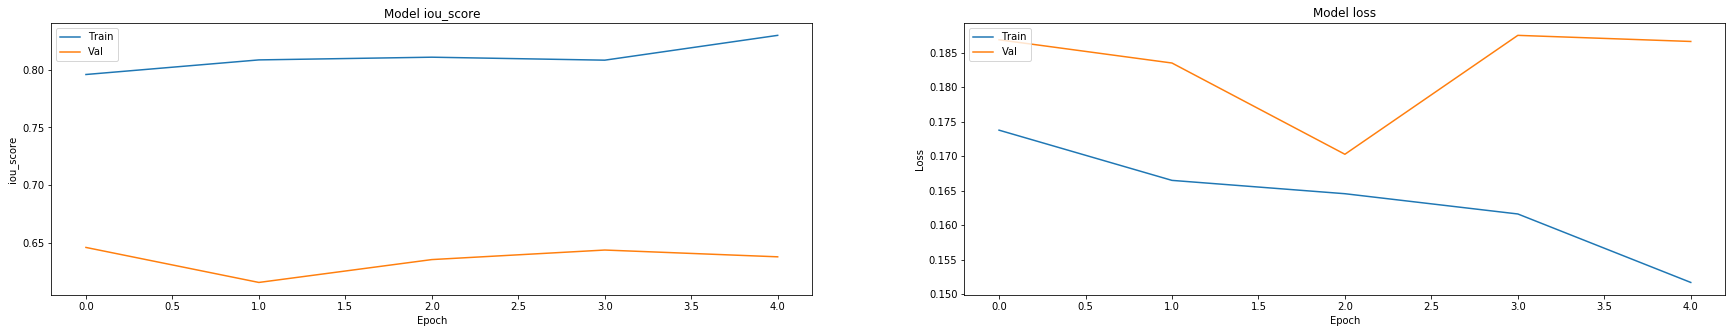

In [72]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['f1-score'])
plt.plot(history.history['val_f1-score'])
plt.title('Model f1-score')
plt.ylabel('f1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Model EValuation

In [54]:

# load best weights
model.load_weights('axis_best_model.h5')

In [55]:
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    #classes=CLASSES, 
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [58]:
validation_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)
scores = model.evaluate_generator(validation_dataloader)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))

Loss: 0.99978
mean iou_score: 0.88879
mean f1-score: 0.9188


In [59]:

scores = model.evaluate_generator(test_dataloader)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))

Loss: 0.99978
mean iou_score: 0.86886
mean f1-score: 0.9002


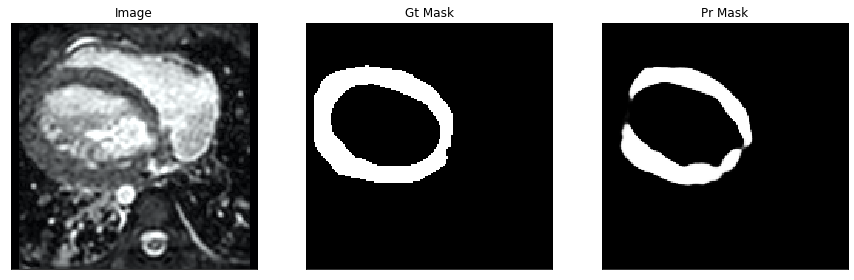

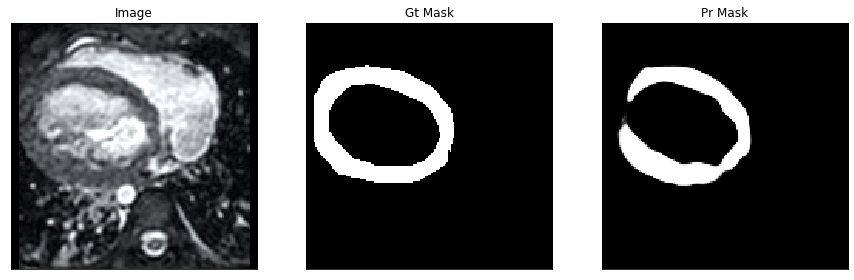

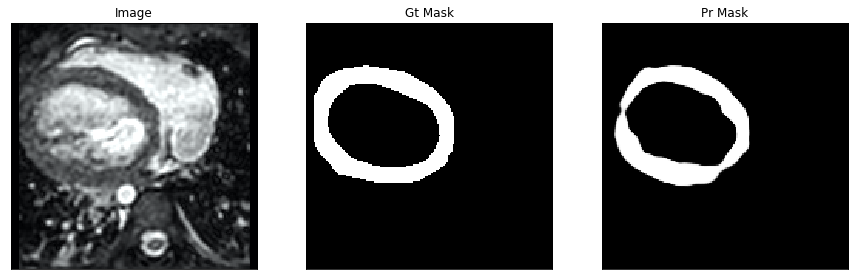

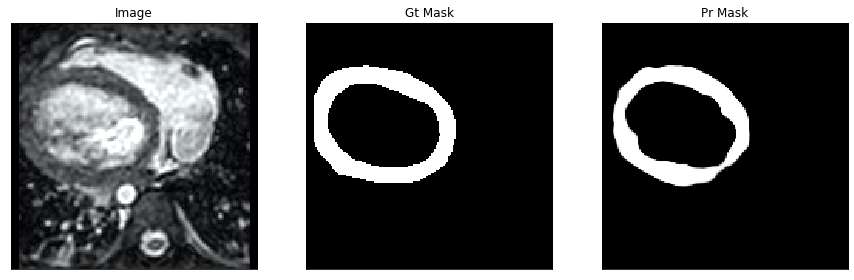

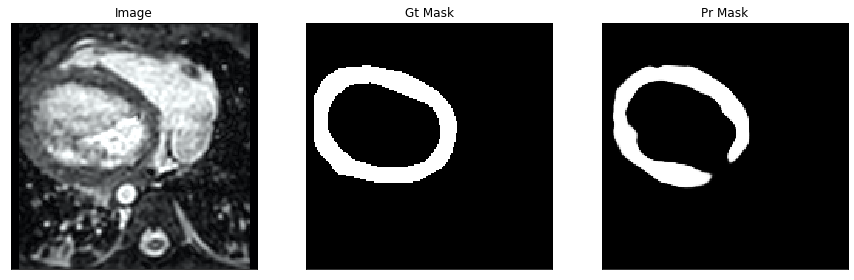

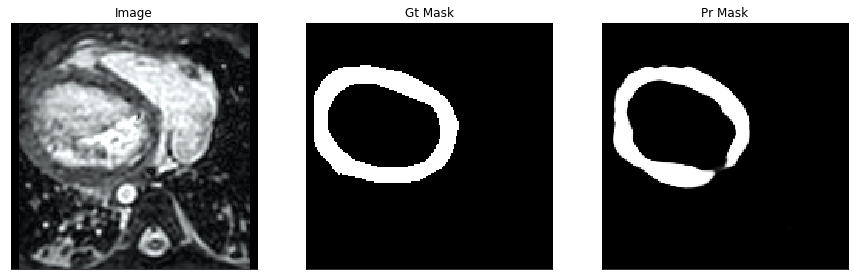

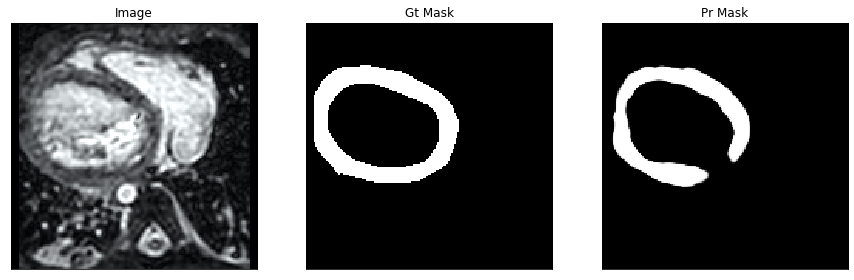

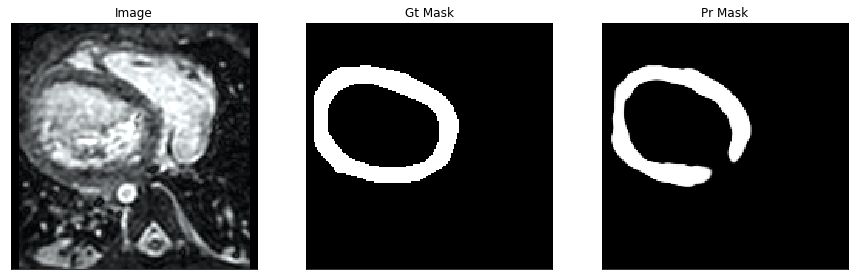

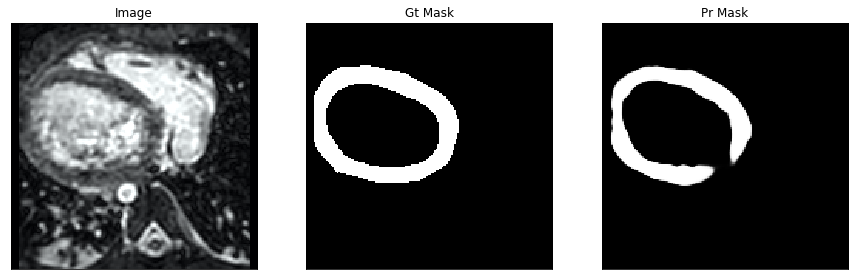

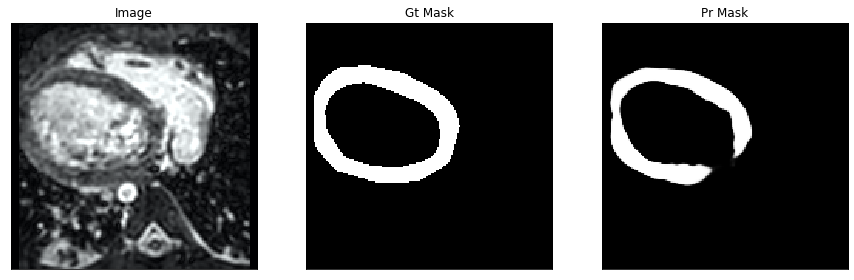

In [68]:
n = 5
ids = np.random.choice(np.arange(len(valid_dataset)), size=n)
ids = range(280,290)
for i in ids:
    
    image, gt_mask = valid_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    visualize(image=denormalize(image.squeeze()),gt_mask=gt_mask.squeeze(),pr_mask=pr_mask.squeeze(),)

In [61]:
len(test_dataset)

1056

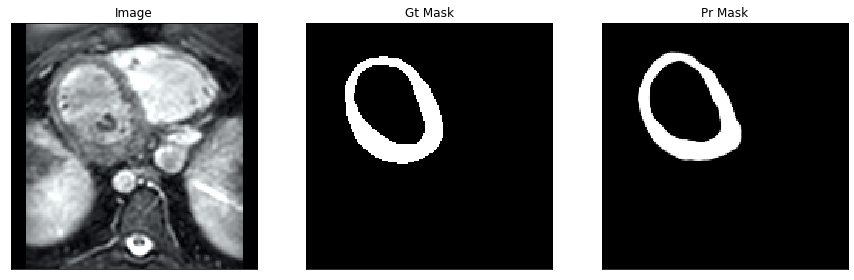

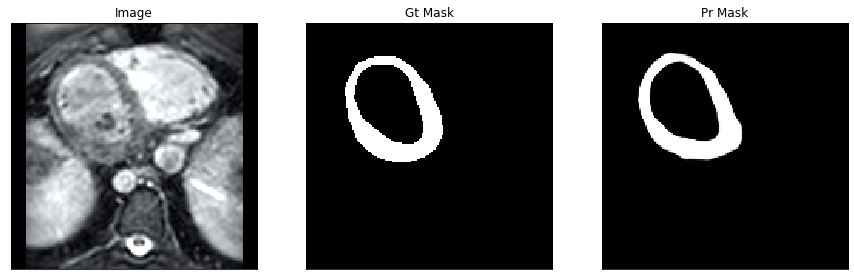

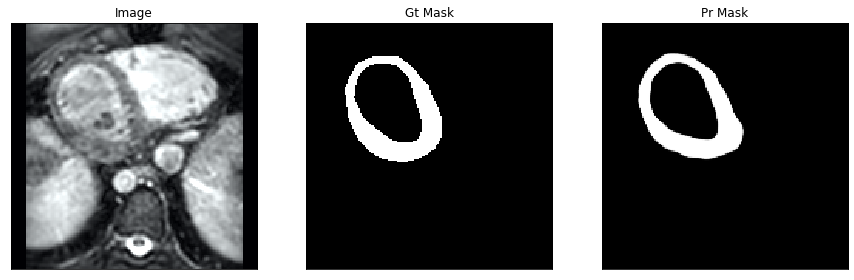

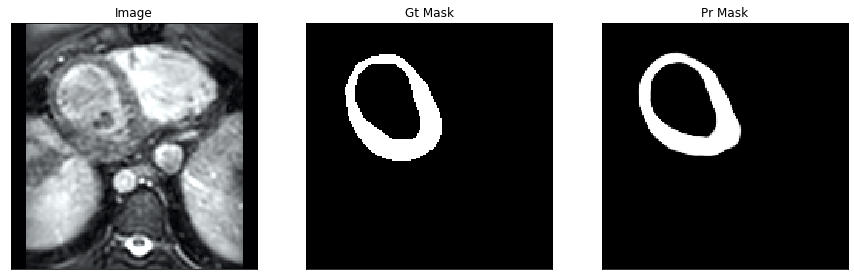

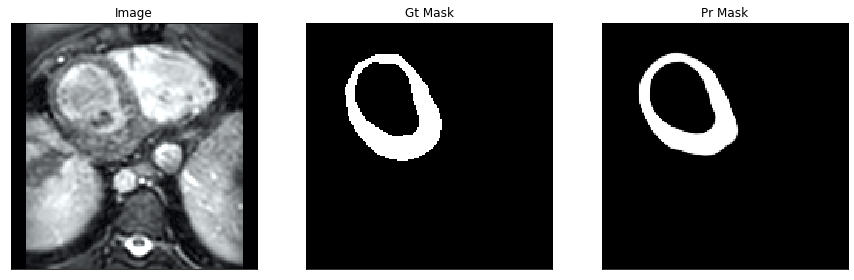

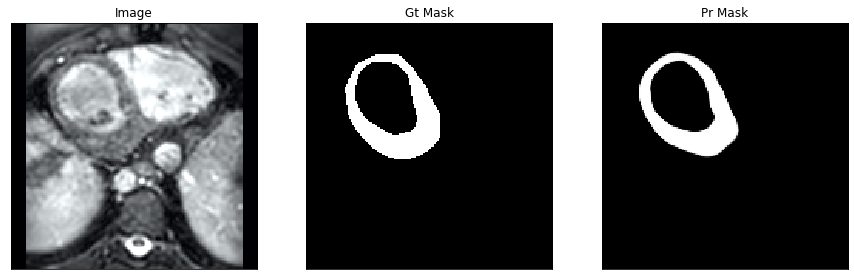

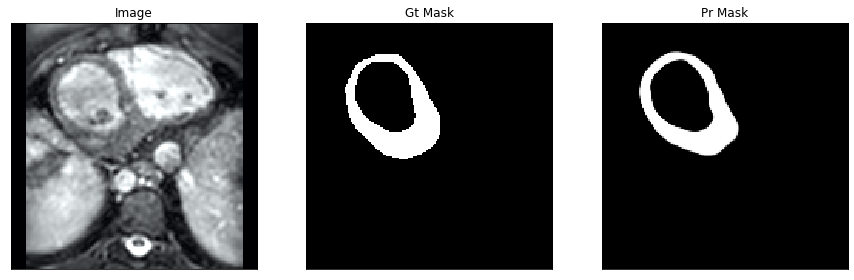

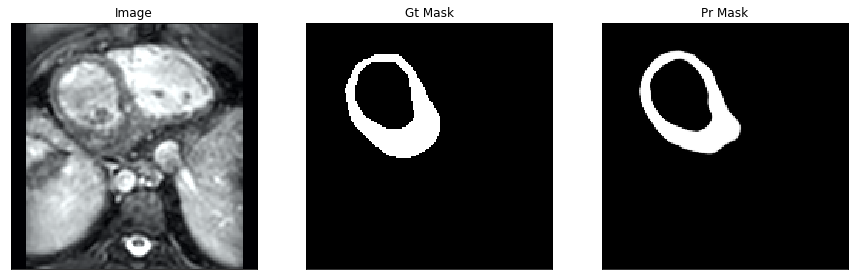

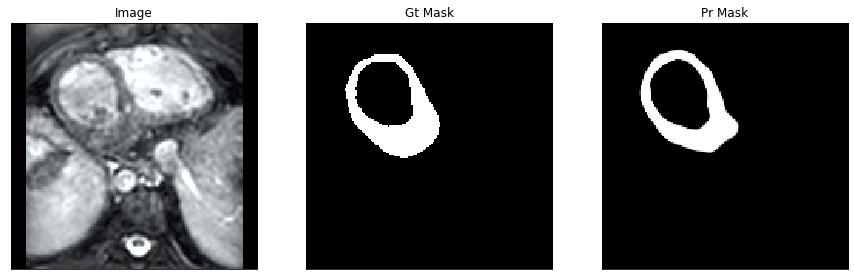

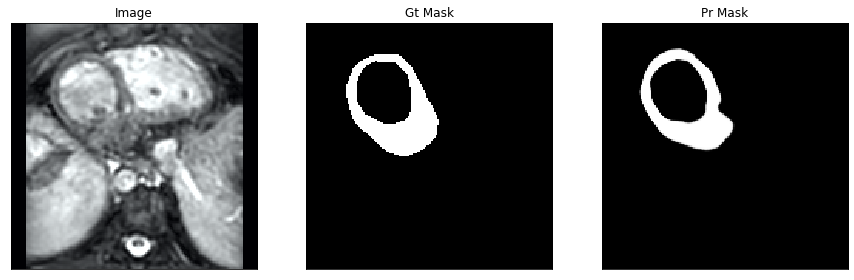

In [76]:
n = 5
#ids = np.random.choice(np.arange(len(test_dataset)), size=n)
ids = range(210,220)

for i in ids:
    
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    visualize(image=denormalize(image.squeeze()),gt_mask=gt_mask.squeeze(),pr_mask=pr_mask.squeeze(),)

In [18]:
n = len(valid_dataset)
#ids = np.random.choice(np.arange(len(valid_dataset)), size=n)
ids = range(n)
dices = []
for i in ids:
    
    image, gt_mask = valid_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    pred = np.round(pr_mask.squeeze())
    gt = np.round(gt_mask.squeeze())
    #if np.sum(gt) > 0:
    dice = (np.sum(pred[gt==1])*2.0 +0.0001) / ((np.sum(pred) + np.sum(gt)) +0.0001)
    #print(dice)
    dices.append(dice)
print("Mean Dice Score:", np.mean(dices))        

Mean Dice Score: 0.9188019231691782


In [19]:
n = len(test_dataset)
#ids = np.random.choice(np.arange(len(valid_dataset)), size=n)
ids = range(n)
dices = []
for i in ids:
    
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    pred = np.round(pr_mask.squeeze())
    gt = np.round(gt_mask.squeeze())
    #if np.sum(gt) > 0:
    dice = (np.sum(pred[gt==1])*2.0 +0.0001) / ((np.sum(pred) + np.sum(gt)) +0.0001)
        #print(dice)
    dices.append(dice)
print("Mean Dice Score:", np.mean(dices))        

Mean Dice Score: 0.9001983199686548


In [24]:

print("Mean Dice Score:", np.mean(dices))

Mean Dice Score: 0.6734590154936594


In [25]:
print("Mean Dice Score:", np.median(dices))

Mean Dice Score: 0.8014449202591822


## Export

In [113]:
n = 384
#ids = np.random.choice(np.arange(len(test_dataset)), size=n)
ids = range(n)
pred = []
for i in ids:
    
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    img = pr_mask.squeeze()
    img = np.array(cv2.resize(img, (140,384), interpolation=cv2.INTER_CUBIC))
    #print(img.shape)
    pred +=[img]

In [114]:
pred = np.array(pred)

In [115]:
pred.shape

(384, 384, 140)

In [117]:
result = np.transpose(pred, (1,0,2))
result.shape

(384, 384, 140)

In [120]:
result = pred

In [118]:
import nibabel as nib
data = "../data/xyz"
nim = nib.load(data)
X,Y,Z = nim.shape
print(X,Y,Z )

384 384 140


In [ ]:
test_dir = "../data/"
print('  Saving segmentation Result...')
nim2 = nib.Nifti1Image(result, nim.affine)
nim2.header['pixdim'] = nim.header['pixdim']
seg_name = '{0}/seg_{1}.nii.gz'.format(test_dir,str(data[0][0]).split("/")[-1].split(".")[0].split("_")[-1])
print(seg_name)
print(nim2.shape)
